## O nosso conjunto de dados é descrito da seguinte forma:


|Atributo                                           |   Descrição   |
|---------------------------------------------------|:-------------:|
| Trip Duration                                     |   Duração da viagem em segundos |
| Start Time                                        |   Início da viagem |
| Stop Time                                         |   Fim da Viagem   |
| Start Station ID                                  |   Identificado da estação origem   |
| Start Station Name                                |   Nome da estação onde a viagem iniciou|
| Start Station Latitude / Start Station Longitude  |   Localização onde a viagem iniciou|
| End station id                                    |   Identificado da estação destino   |
| End Station Name                                  |   Nome da estação onde a viagem terminou|
| End Station Latitude / End Station Longitude      |   Localização onde a viagem terminou   |
| Bike ID                                           |   Identificado da bicicleta  |
| User Type                                         |   Customer = passe de 24 horas ou 3 dias; Subscriber = Membro Anual |
| Birth Year                                        |   Ano de nascimento|
| Gender                                            |   0 = desconhecido; 1 = masculino; 2 = feminino |

In [1]:
# importanto as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 100)   # Mostra todas as colunas do dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importando o dataset

df = pd.read_parquet('/content/drive/MyDrive/Projeto UFRJ-Analytica/citibike2016-2019.parquet')

In [4]:
# fazendo uma visualização inicial dos dados

df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN


# Tratamento e limpeza dos dados

In [5]:
# removendo as colunas duplicadas

df = df[['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']].copy()

In [6]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


In [7]:
# removendo linhas duplicadas

df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [8]:
# verificando a quantidade de valores nulos para cada coluna

df.isna().sum()

tripduration                    1
starttime                       1
stoptime                        1
start station id              152
start station name            152
start station latitude          1
start station longitude         1
end station id                152
end station name              152
end station latitude            1
end station longitude           1
bikeid                          1
usertype                        1
birth year                 185692
gender                          1
dtype: int64

In [9]:
# removendo as linhas onde start_station_id tem valores nulos, já que são poucas

df = df.dropna(subset=['start station id'])

In [10]:
# verificando o que ainda resta de valores nulos

df.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 185691
gender                          0
dtype: int64

In [11]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [12]:
# renomeando colunas

df = df.rename(columns={'start station id':'start_station_id',
                   'start station name':'start_station_name',
                   'start station latitude':'start_station_latitude',
                   'start station longitude': 'start_station_longitude',
                   'end station id':'end_station_id',
                   'end station name':'end_station_name',
                   'end station latitude':'end_station_latitude',
                   'end station longitude':'end_station_longitude',
                   'birth year': 'birth_year'})

In [13]:
# visualizando o dataset com as colunas modificadas

df.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


### Podemos verificar que na coluna 'birth_year' existem alguns valores negativos o que não faz muito sentido. Devemos ter valores positivos.

In [14]:
df['birth_year']

0         -1992.0
1         -1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1978.0
3999996    1981.0
3999997    1980.0
3999998    1965.0
3999999    1981.0
Name: birth_year, Length: 3603071, dtype: float64

In [15]:
# tomando o modulo dos valores de birth_year

df ['birth_year'] = df['birth_year'].abs()
df['birth_year']

0          1992.0
1          1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1978.0
3999996    1981.0
3999997    1980.0
3999998    1965.0
3999999    1981.0
Name: birth_year, Length: 3603071, dtype: float64

### Verificando datas;

*   convertendo o tempo de duração da viagem para minutos
*   criando nova coluna com idades
*   criando nova coluna com dias da semana





In [16]:
# passando valores das datas de float para tipo datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# alterando coluna de duração de viagem para minutos
df['tripduration'] = df['tripduration']/60.
df = df.rename(columns={'tripduration':'tripduration_min'})

In [17]:
# contando a quantidade de linhas com viagens com mais de 120 minutos
count_over_120 = len(df[df['tripduration_min'] > 120])

print(f"Quantidade de linhas com viagens com mais de 120 minutos: {count_over_120}")

Quantidade de linhas com viagens com mais de 120 minutos: 11949


In [18]:
# Removendo as linhas com viagens com mais de 120 minutos
df = df[df['tripduration_min'] <= 120]

In [19]:
# criando a coluna age: pega o ano em que a pessoa usou a bike e subtrai do ano de nascimento

df['age'] = df['starttime'].dt.year - df['birth_year']

In [20]:
# contando a quantidade de linhas com usuários com mais de 85 anos
count_over_80 = len(df[df['age'] > 85])

print(f"Quantidade de linhas com usuários com mais de 85 anos: {count_over_80}")

Quantidade de linhas com usuários com mais de 85 anos: 2324


In [21]:
# Removendo as linhas com usuários com mais de 85 anos
df = df[df['age'] <= 85]

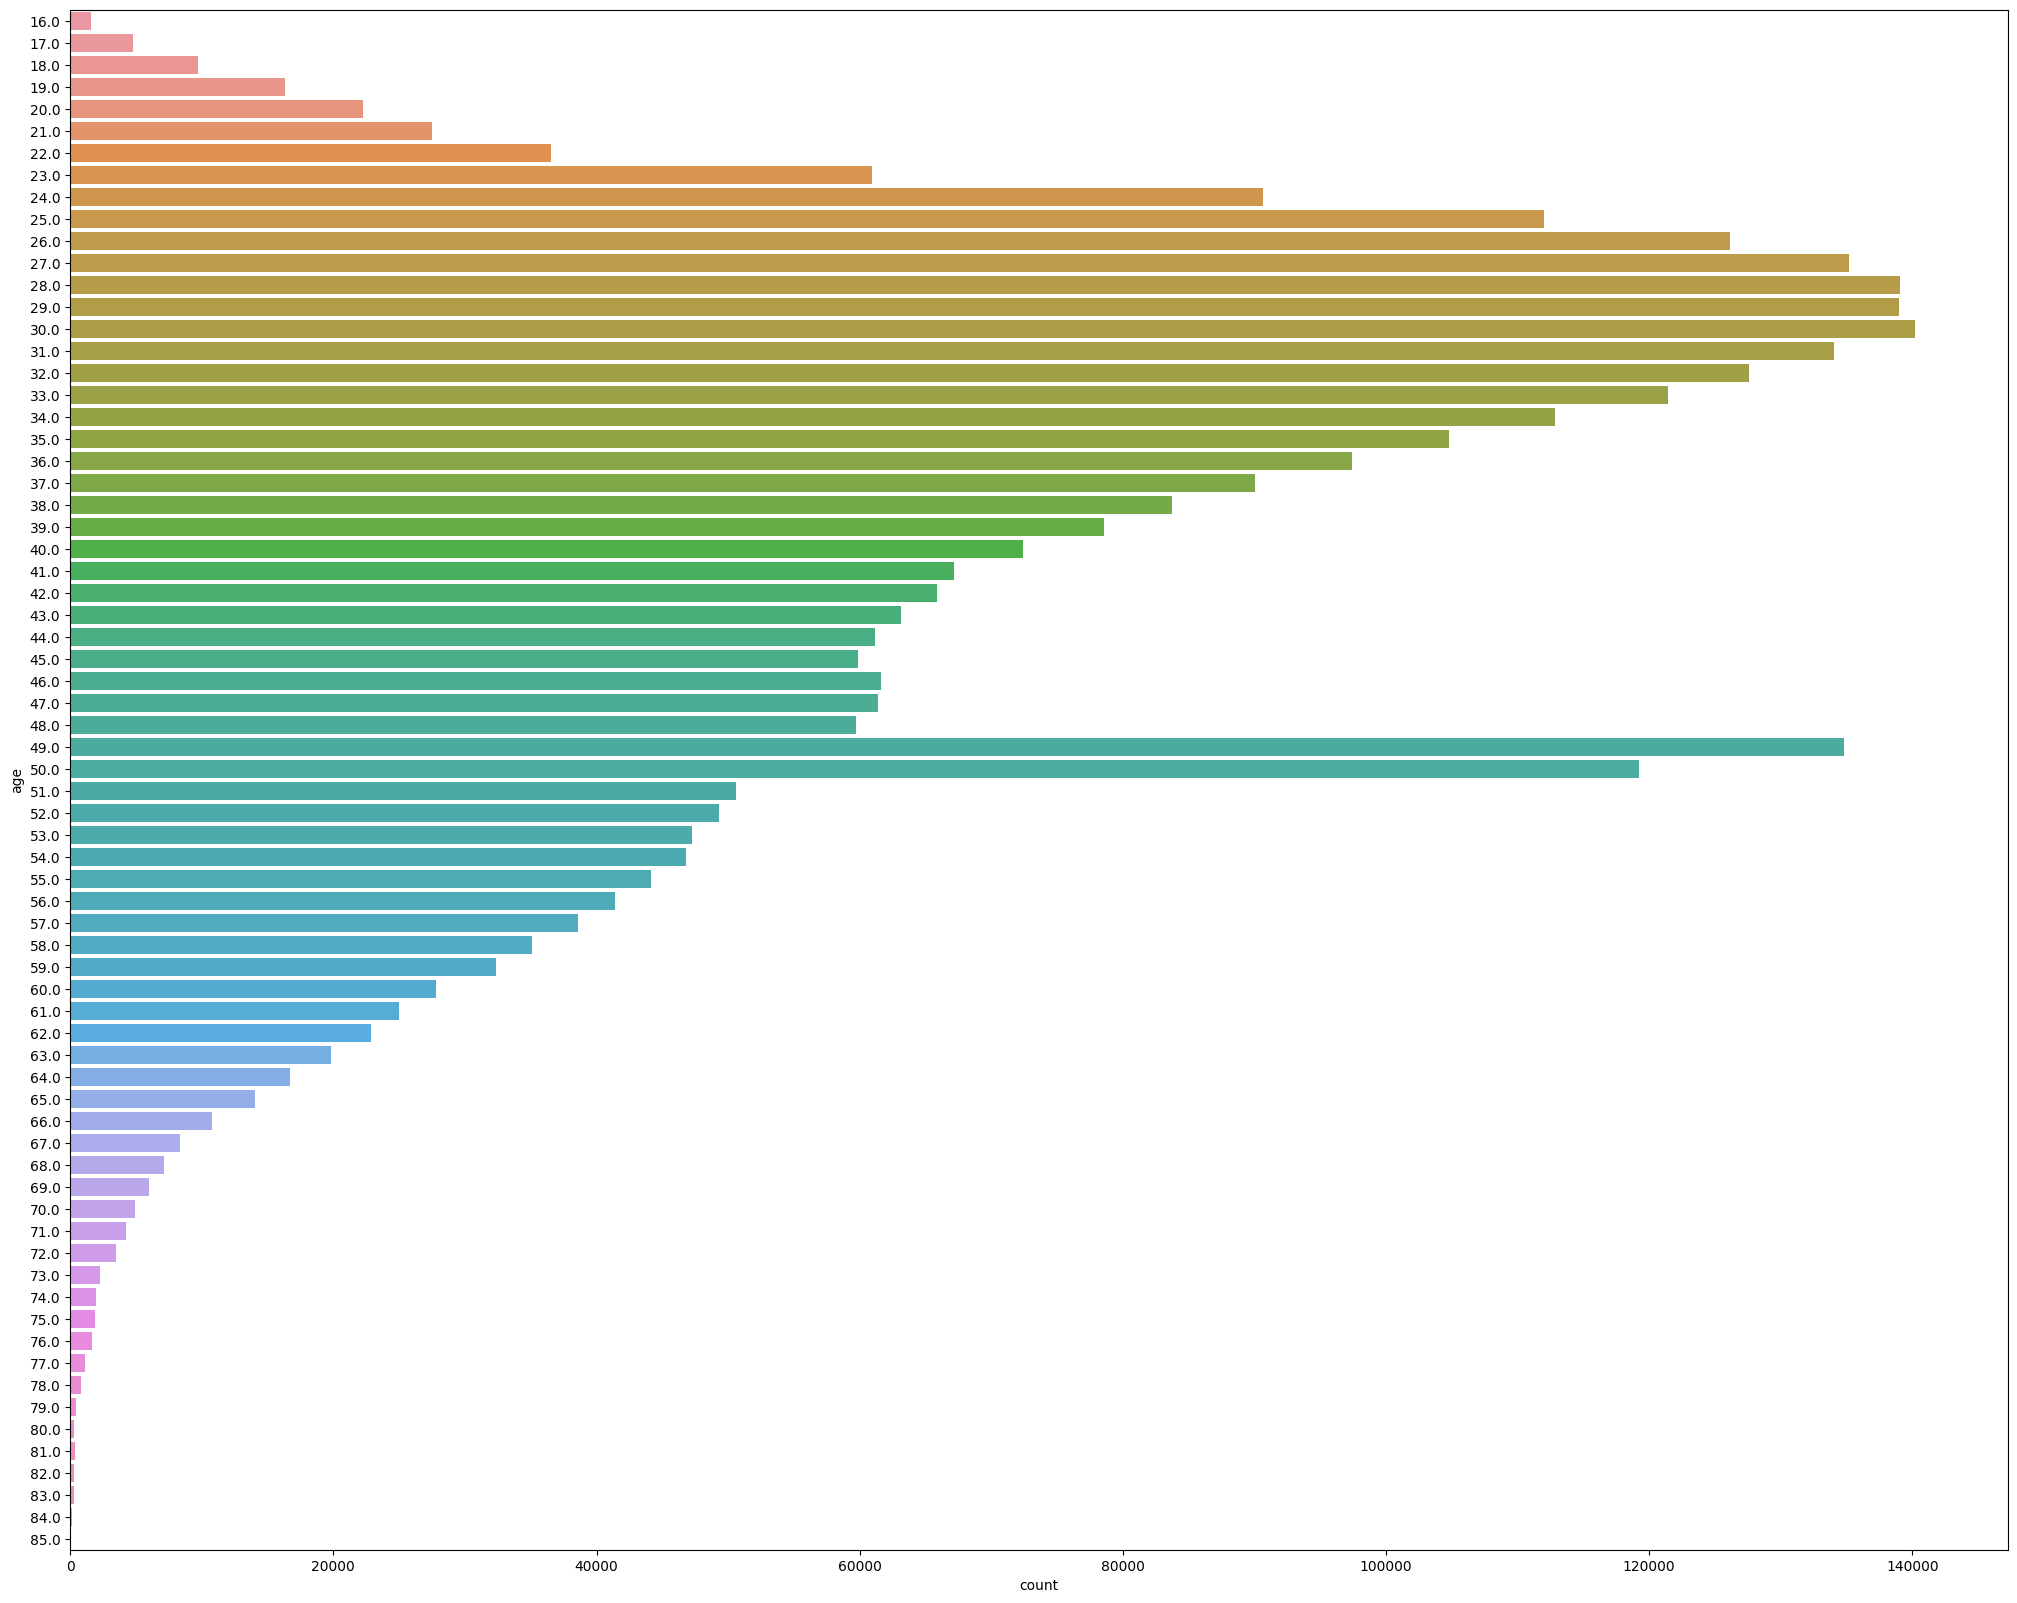

In [22]:
# verificando a distribuição das idades

plt.figure(figsize=(25,20))
sns.countplot(y = df['age'])
plt.show()

In [23]:
# verificar pq tantos de 1969

count_1969 = len(df[df['birth_year'] == 1969])
print(f"Quantidade de linhas com birth_year igual a 1969: {count_1969}")

Quantidade de linhas com birth_year igual a 1969: 203346


In [24]:
# Substituir todos os valores 1969 por valores ausentes (NaN)
df['birth_year'] = df['birth_year'].replace(1969, pd.NA)

RecursionError: ignored

In [ ]:
# criando uma coluna weekday

df['weekday'] = df['starttime'].dt.day_name()

In [ ]:
# criando a coluna 'weekend' indicando se a viagem ocorreu em um final de semana

# 5 e 6 representam sábado e domingo
df['weekend'] = df['starttime'].dt.dayofweek.isin([5, 6])

In [ ]:
# visualizando as alterações

df.head()

### Estações removidas

In [ ]:
# algumas estações possuem coordenadas estranhas. Optamos por removê-las, visto que são poucas linhas.

# lista das estações que iremos remover
stations_to_remove = ["WS Don't Use", "8D Mobile 01", "8D QC Station 01", "JSQ Don't Use"]

# removendo as linhas que contenham essas estações
df = df[~df['start_station_name'].isin(stations_to_remove)]

# Análise exploratória de dados (EDA)

## Localização geográfica das Estações do Citi Bike

In [ ]:
import plotly.express as px

# Criar um DataFrame com as coordenadas únicas de cada estação
unique_locations = df[['start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

# Plotar o mapa usando Plotly Express com scatter_mapbox
fig = px.scatter_mapbox(
    unique_locations,
    lat='start_station_latitude',
    lon='start_station_longitude',
    text='start_station_name',
    hover_name='start_station_name',
    mapbox_style='carto-positron',  # Estilo do mapa, você pode escolher outros estilos
)

# Definir o centro do mapa e o nível de zoom
center_lat = unique_locations['start_station_latitude'].mean()
center_lon = unique_locations['start_station_longitude'].mean()
zoom_level = 10

fig.update_layout(
    mapbox={
        'center': {'lat': center_lat, 'lon': center_lon},
        'zoom': zoom_level
    }
)

# Ajustar as margens internas para remover as bordas brancas
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Exibir o mapa
fig.show()


## Estações mais populares e possíveis relações

In [ ]:
# contagem das estações mais populares
popular_stations = df['start_station_name'].value_counts().head(10)

# plotando um gráfico de barras para as estações mais populares
plt.figure(figsize=(10, 6))
popular_stations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Estações Mais Populares')
plt.xlabel('Estação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# calculando o volume de viagens por estação
station_trip_volume = df['start_station_name'].value_counts()

# criando um df com as informações das estações únicas e suas coordenadas
unique_locations = df[['start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

# criando um df com as informações das estações e seus volumes de viagens
station_data = pd.DataFrame({
    'start_station_name': station_trip_volume.index,
    'trip_volume': station_trip_volume.values
})

# merge entre os dfs
unique_locations = unique_locations.merge(station_data, on='start_station_name')

# plotandi o mapa usando Plotly Express com scatter_mapbox
fig = px.scatter_mapbox(
    unique_locations,
    lat='start_station_latitude',
    lon='start_station_longitude',
    text='start_station_name',
    hover_name='start_station_name',
    size='trip_volume',  # tamanho proporcional ao volume de viagens
    size_max=50,  # tamanho máximo do ponto
    color='trip_volume',  # escala de cores de acordo com o volume de viagens
    color_continuous_scale='RdBu_r',  # esquema de cores
    mapbox_style='carto-positron',  # estilo do mapa
)

# definindo o centro do mapa e o nível de zoom
center_lat = unique_locations['start_station_latitude'].mean()
center_lon = unique_locations['start_station_longitude'].mean()
zoom_level = 10

fig.update_layout(
    mapbox={
        'center': {'lat': center_lat, 'lon': center_lon},
        'zoom': zoom_level
    }
)

# ajusantado as margens internas para remover as bordas brancas
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# exibindo o mapa
fig.show()

### Relações entre as estações mais populares

In [ ]:
# nomes das estações mais populares
popular_stations = ['Pershing Square North', 'E 17 St & Broadway', 'W 21 St & 6 Ave', 'Broadway & E 22 St', 'West St & Chambers St', 'Broadway & E 14 St', '8 Ave & W 33 St', '8 Ave & W 31 St', '12 Ave & W 40 St', 'W 20 St & 11 Ave']

# filtrando o DataFrame para incluir apenas as estações mais populares
filtered_df = df[df['start_station_name'].isin(popular_stations)]

In [ ]:
# criando uma coluna para representar as combinações de estações de origem e destino
filtered_df['station_combination'] = filtered_df['start_station_name'] + ' -> ' + filtered_df['end_station_name']

# calculando o número de viagens para cada combinação de estações
station_combination_counts = filtered_df['station_combination'].value_counts().reset_index()
station_combination_counts.columns = ['Combinação de Estações', 'Número de Viagens']

# ordenando as combinações de estações pelo número de viagens
station_combination_counts = station_combination_counts.sort_values(by='Número de Viagens', ascending=False)

# plotando um gráfico de barras para mostrar as combinações de estações com mais viagens
plt.figure(figsize=(12, 8))
sns.barplot(data=station_combination_counts.head(10), x='Número de Viagens', y='Combinação de Estações')
plt.title('Estações populares com mais viagens entre si')
plt.xlabel('Número de Viagens')
plt.ylabel('Combinação de Estações')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

### Conexão espacial entre as estações populares com mais viagens entre si

In [ ]:
# obtendo os nomes das estações e suas coordenadas a partir das colunas do gráfico
station_coordinates = {}
for index, row in station_combination_counts.head(10).iterrows():
    combination = row['Combinação de Estações'].split(' -> ')
    start_station = combination[0]
    end_station = combination[1]

    # obtendo as coordenadas das estações a partir do DataFrame original
    start_coordinates = df[df['start_station_name'] == start_station][['start_station_latitude', 'start_station_longitude']].iloc[0]
    end_coordinates = df[df['end_station_name'] == end_station][['end_station_latitude', 'end_station_longitude']].iloc[0]

    station_coordinates[(start_station, end_station)] = [start_coordinates.tolist(), end_coordinates.tolist()]

# criando um mapa Folium
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# adicionando marcadores para todas as estações
for stations, coordinates in station_coordinates.items():
    for station, coord in zip(stations, coordinates):
        folium.Marker(
            location=coord,
            popup=station
        ).add_to(m)

# adicionando linhas de conexão para as estações de cada coluna
for stations, coordinates in station_coordinates.items():
    description = f"Conexão entre {stations[0]} e {stations[1]}"
    folium.PolyLine(coordinates, color="blue", popup=description).add_to(m)

# exibindo o mapa interativo
m

lembrar de interpretar as conexão acima.
Pershing Square North parece importante por se conectar com várias, e 12 Ave & W 40 St por se conectar com estações distantes

## Distribuição do uso de bicicletas ao longo da semana

In [ ]:
uso_semanal = df.groupby('weekday').size()    # Agrupa os dados nos dias da semana e nos da a frequencia de ocorrencia por dia
uso_semanal = uso_semanal.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])   # organiza os dados

uso_semanal

In [ ]:
# criando o gráfico de barras e verificando dia com maior frequencia

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=uso_semanal.index, y=uso_semanal.values, color='blue')
plt.xlabel('Dias da semana', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Uso das bicicletas por dia da semana', weight='bold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# contando o número de viagens em dias de semana e finais de semana
usage_by_weekend = df.groupby('weekend')['weekend'].count()

# plotando um gráfico de barras
plt.figure(figsize=(8, 6))
usage_by_weekend.plot(kind='bar', color=['blue', 'green'])
plt.title('Uso de bicicletas em dias de semana vs. finais de semana')
plt.xlabel('Tipo de Dia')
plt.ylabel('Número de Viagens')
plt.xticks(ticks=[0, 1], labels=['Dias de Semana', 'Finais de Semana'], rotation=0)
plt.tight_layout()
plt.show()

## Existe variação por estação?

In [ ]:
# criando colunas de mês e ano
df['month'] = df['starttime'].dt.month
df['year'] = df['starttime'].dt.year

# definindo os intervalos de meses para cada estação do ano
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]
winter_months = [12, 1, 2]

# função para mapear o mês para a estação do ano
def map_season(month):
    if month in spring_months:
        return 'Spring'
    elif month in summer_months:
        return 'Summer'
    elif month in fall_months:
        return 'Fall'
    else:
        return 'Winter'

# aplicando a função para criar a coluna 'season'
df['season'] = df['month'].apply(map_season)

# filtrando apenas as estações populares
df_popular = df[df['start_station_name'].isin(popular_stations)]

# agrupando e contando de viagens por estação do ano e estação
station_season_counts = df_popular.groupby(['season', 'start_station_name']).size().reset_index(name='Number of Trips')

# criando um gráfico de linha para cada estação
plt.figure(figsize=(12, 8))

for station in popular_stations:
    station_data = station_season_counts[station_season_counts['start_station_name'] == station]
    plt.plot(station_data['season'], station_data['Number of Trips'], label=station)

plt.title('Variação do uso de bicicletas por estação do ano em Nova York')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Viagens')
plt.legend()
plt.tight_layout()
plt.show()

## Rotas mais Populares (Origem - Destino) e seus Destaques:

In [ ]:
# criando nova coluna das rotas baseadas nos ID's das estações

df['Routes'] = df['start_station_name'] + ' - \n ' + df['end_station_name']

popular_routes = df.groupby('Routes').size().reset_index(name='Frequency')   # agrupa dados por rotas e cria coluna com frequencias

popular_routes = popular_routes.sort_values(by='Frequency', ascending=False)    # Organizando valores de maneira Decrescente

In [ ]:
# visualizando as rotas mais populares

popular_routes

In [ ]:
# selecionando as 5 rotas mais populares

top_5 = popular_routes.head(5)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# Criar um gráfico de barras usando Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=top_5, x='Frequency', y='Routes')
plt.xlabel('Frequency', fontdict=font)
plt.ylabel('Routes (Star Point - End Point)',  fontdict=font)
plt.title('Top 5 Popular Routes', weight='bold', fontdict=font)
plt.yticks(rotation=45)


plt.tight_layout()
plt.show()


## Verificando a proporção por gênero

In [ ]:
# podemos ver quantos são homens(1), mulheres(2) e desconhecidos(0)

df['gender'].value_counts()

In [ ]:
# agrupando os dados por gênero e contar o número de ocorrências
gender_counts = df['gender'].value_counts()

# calculando a proporção de cada gênero em relação ao total
total_users = gender_counts.sum()
gender_proportions = gender_counts / total_users

# criando um gráfico de barras para mostrar as proporções
labels = ['Desconhecido', 'Homens', 'Mulheres']
colors = ['gray', 'blue', 'pink']

plt.figure(figsize=(8, 6))
plt.bar(labels, gender_proportions, color=colors)
plt.title('Proporção de Gênero que Utiliza Bicicletas')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.show()


## Distribuição por horários

In [ ]:
# extraindo a hora de início da viagem
df['start_hour'] = df['starttime'].dt.hour

# calculando a distribuição das viagens ao longo das horas do dia em dias úteis (weekday) e fins de semana (weekend)
hourly_distribution_weekday = df[df['weekend'] == False]['start_hour'].value_counts(normalize=True).sort_index()
hourly_distribution_weekend = df[df['weekend'] == True]['start_hour'].value_counts(normalize=True).sort_index()

# criando um gráfico de linha para mostrar a distribuição ao longo das horas
plt.figure(figsize=(10, 6))
plt.plot(hourly_distribution_weekday.index, hourly_distribution_weekday.values, label='Dias Úteis')
plt.plot(hourly_distribution_weekend.index, hourly_distribution_weekend.values, label='Fins de Semana')
plt.title('Distribuição do uso de bicicletas por horário')
plt.xlabel('Hora do Dia')
plt.ylabel('Proporção de Viagens')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


## Duração média das viagens por classes

In [ ]:
# verificando a duração média das viagens

df['tripduration_bins'] = pd.cut(df['tripduration_min'], [0, 30, 60, 120])

sns.barplot(x='tripduration_bins', y='tripduration_min', data=df, estimator=np.size)
plt.title('Duração mais comum das viagens', fontsize=20)
plt.xlabel('Classes', fontsize=20)
plt.ylabel('Duração', fontsize=20)
plt.show()

## Perfil de assinatura do serviço

In [ ]:
# verificando se o serviço é mais utilizado por assinantes de longo prazo ou curto prazo

user_type_count = df['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 15} )
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

## Distribuição do uso por idade e gênero

In [ ]:
# verificando qual o perfil de idade e uso de cada gênero

gender_mapping = {0: 'Desconhecido', 1: 'Homem', 2: 'Mulher'}
df['gender'] = df['gender'].map(gender_mapping)
sns.set(rc={"figure.figsize":(25,20)})
sns.countplot(data=df, y = df['age'], hue='gender', dodge=True)